#  Week 2: Pandas

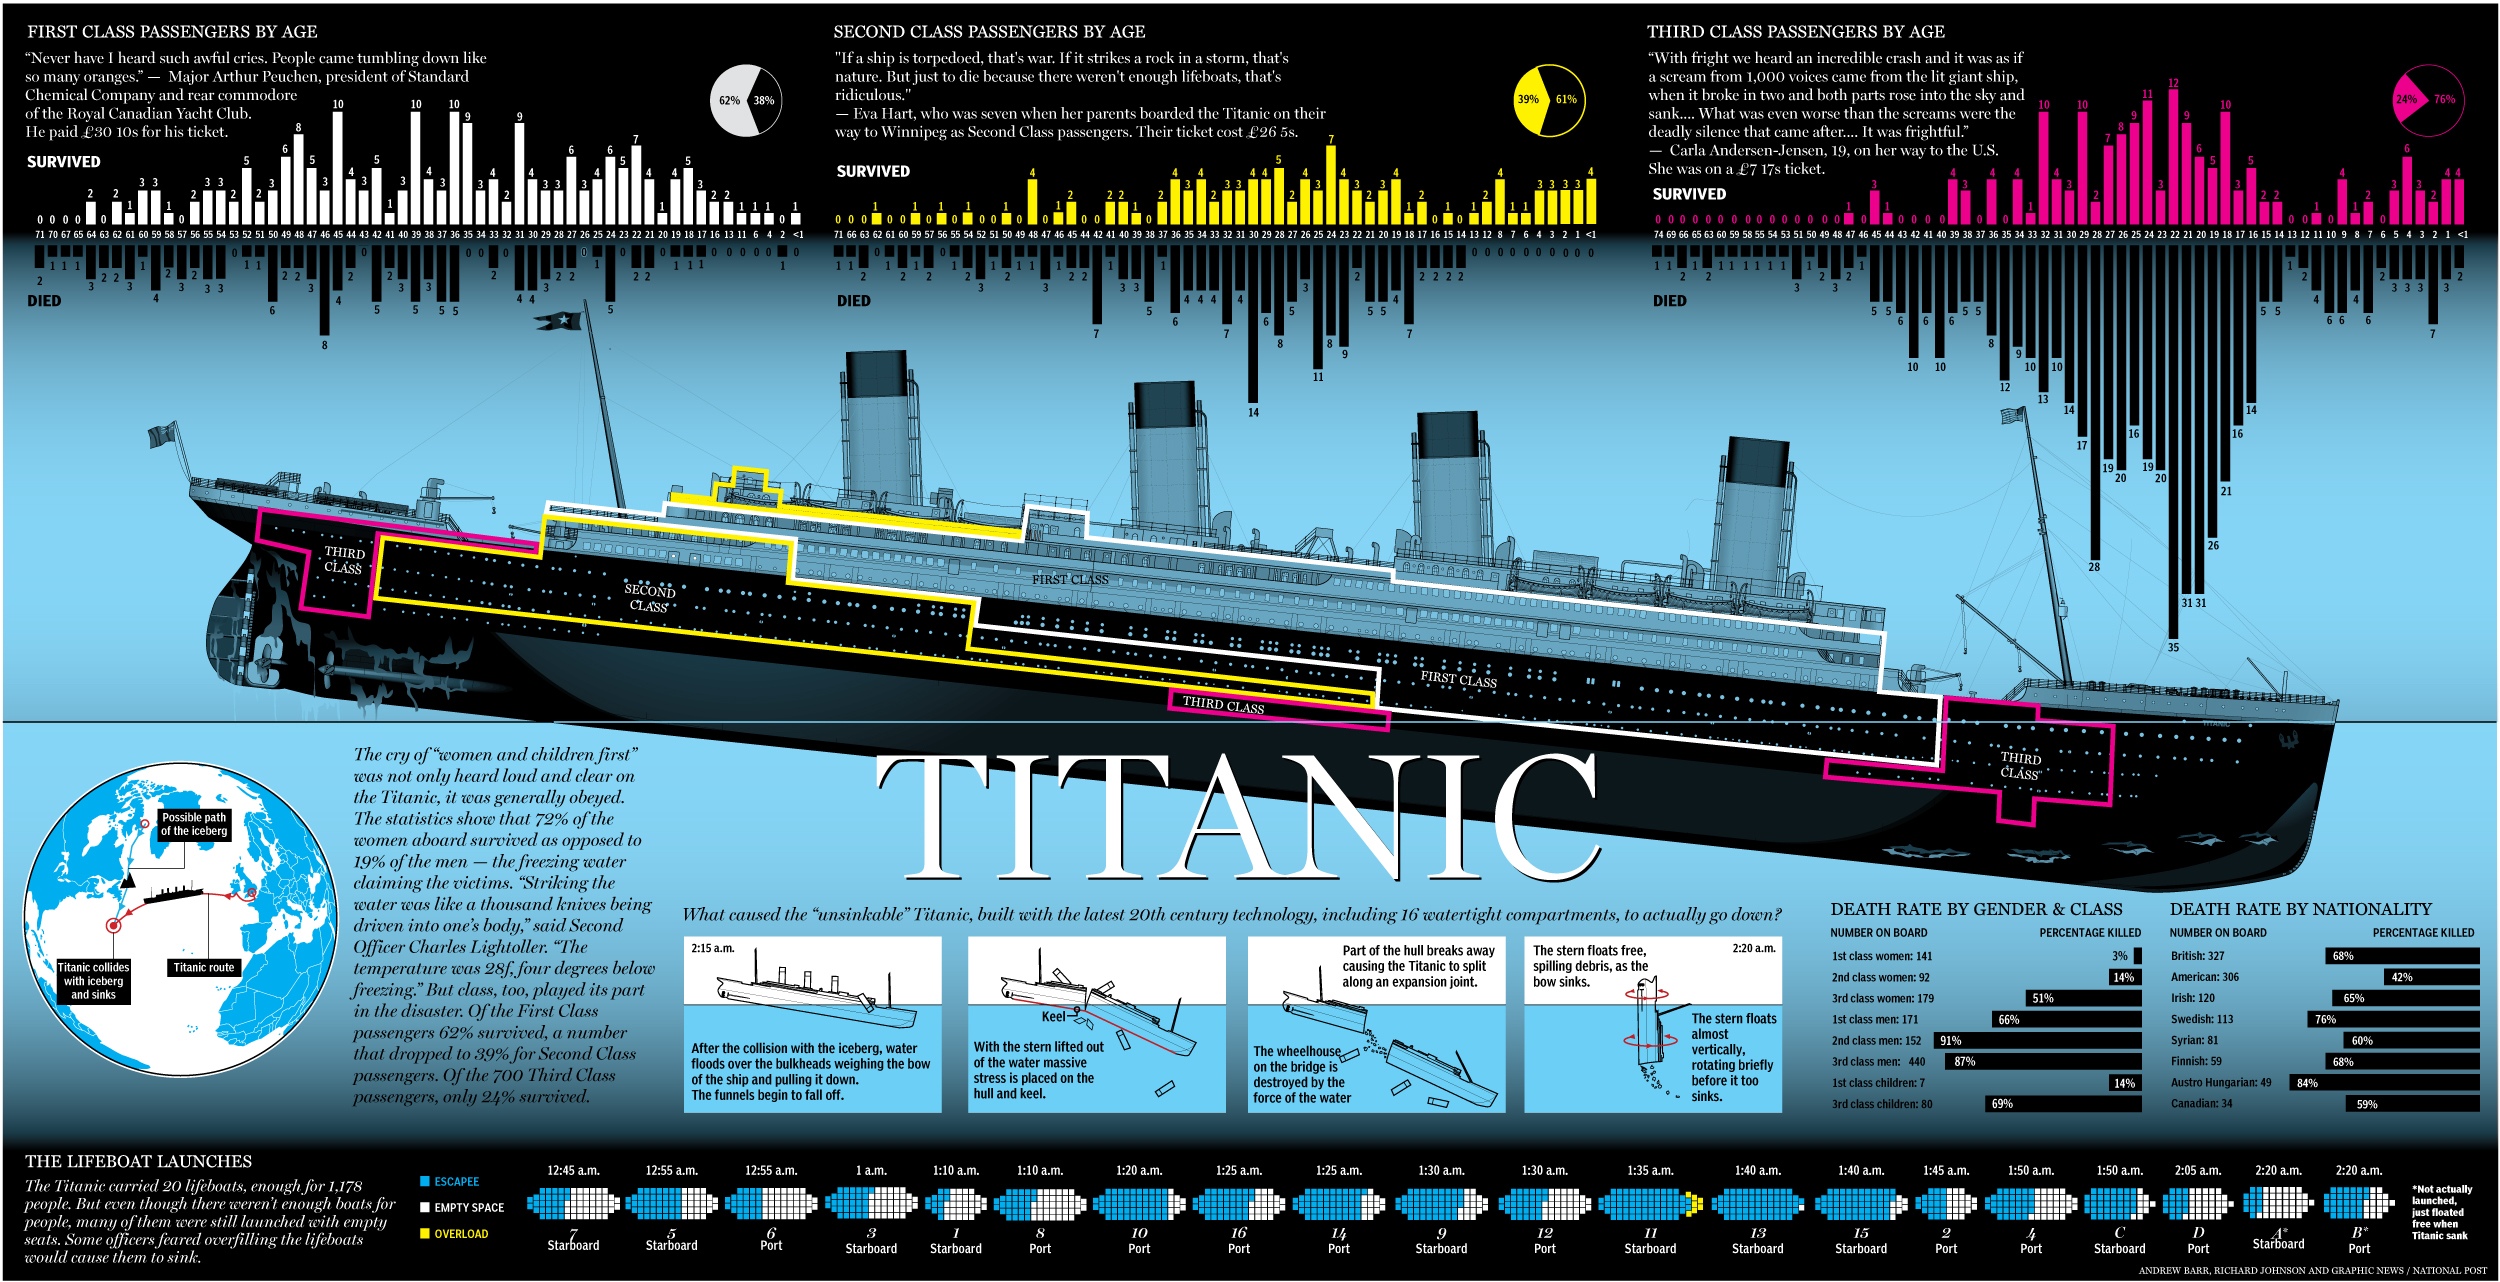

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 데이터 파악하기

In [2]:
df = pd.read_csv('titanic/train.csv')
df_copy = df.copy()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print('Titanic shape :', df.shape)

Titanic shape : (891, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Age, Cabin, Embarked는 NaN이 존재한다.

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

Survived는 0, 1로 0이면 사망, 1이면 생존을 나타낸 것이다.

### Boolean indexing

In [27]:
df[df['Survived'] == 1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [9]:
df[(df['Survived'] == 1) & (df['Sex'] == 'male')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
...,...,...,...,...,...,...,...,...,...,...,...,...
838,839,1,3,"Chip, Mr. Chang",male,32.0,0,0,1601,56.4958,NaN,S
839,840,1,1,"Marechal, Mr. Pierre",male,NaN,0,0,11774,29.7000,C47,C
857,858,1,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.5500,E17,S
869,870,1,3,"Johnson, Master. Harold Theodor",male,4.0,1,1,347742,11.1333,NaN,S


### groupby

In [10]:
pd.DataFrame(df.groupby('Pclass')['Fare'].mean())

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [11]:
df.groupby('Pclass')['Fare'].agg(['count', 'mean'])

,count,mean
Pclass,,
1,216,84.154687
2,184,20.662183
3,491,13.675550


### NaN

In [12]:
df['Cabin'].isnull()

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Name: Cabin, Length: 891, dtype: bool

isnull() 메소드를 통해 각 행마다 NaN이면 True, 아니면 False 값을 반환해줍니다.

In [13]:
missing = df['Cabin'].isnull().sum()
df['Cabin'].isnull().sum()

687

In [14]:
print('전체 데이터 중 NaN의 비율: ', round(missing / df.shape[0], 3))

전체 데이터 중 NaN의 비율:  0.771


### NaN 처리 : Drop

결측치 비율이 높고, 분석에 무용하다고 생각하면 삭제하는게 좋음

In [15]:
df.drop('Cabin', axis = 1)
df['Cabin'].head()

0     NaN
1     C85
2     NaN
3    C123
4     NaN
Name: Cabin, dtype: object

할당이나 inplace = True를 해줘야 완벽히 삭제가 됨!

In [16]:
df.drop('Cabin', axis = 1, inplace = True)
# df['Cabin'].head()

In [17]:
df['Age'].isnull().sum()

177

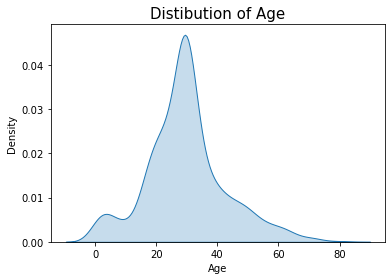

In [29]:
sns.kdeplot(df['Age'], fill = True)
plt.title('Distibution of Age', size = 15)
plt.show()

kde plot (Kernel Density Estimator) : 커널밀도함수, 히스토그램을 유연하게 표현한 것임.

In [19]:
print('승객의 평균 연령: ',round(df['Age'].mean(), 3))

승객의 평균 연령:  29.699


### NaN 처리 : fillna

In [20]:
df['Age'].fillna(df['Age'].mean())
print('fillna 후 Age의 결측값 수: ',df['Age'].isnull().sum())

fillna 후 Age의 결측값 수:  177


반드시 할당을 하거나 inplace = True 구문 선언을 해줘야함! 기본값을 False이다.

In [21]:
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Age'].isnull().sum()

0

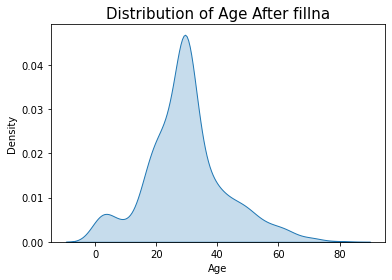

In [22]:
sns.kdeplot(df['Age'], fill = True)
plt.title('Distribution of Age After fillna', size = 15)
plt.show()

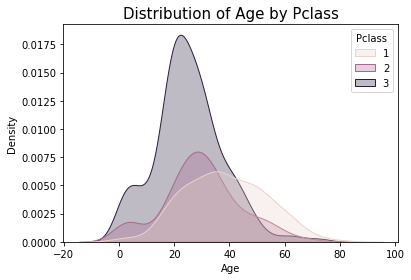

In [23]:
sns.kdeplot(df_copy['Age'], fill = True, hue = df_copy['Pclass'], alpha = .3)
plt.title('Distribution of Age by Pclass', size = 15)
plt.show()

Pclass에 따라 Age의 분포가 다른 것을 확인 할 수 있습니다.

따라서 Pclass 등급에 따라 Age의 결측값을 달리 처리하겠습니다.

In [24]:
df.groupby('Pclass')['Age'].agg(['count', 'median'])

,count,median
Pclass,,
1,216,35.000000
2,184,29.699118
3,491,29.699118


### fillna - groupby - transform

In [25]:
df_copy['Age'].fillna(df_copy.groupby('Pclass')['Age'].transform('median'), inplace = True)
df_copy['Age'].isnull().sum()

0

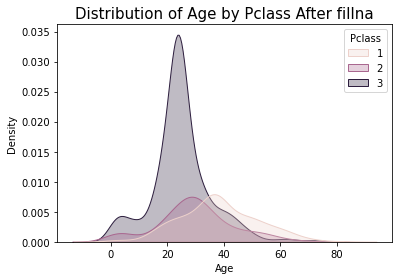

In [26]:
sns.kdeplot(df_copy['Age'], fill = True, hue = df_copy['Pclass'], alpha = .3)
plt.title('Distribution of Age by Pclass After fillna', size = 15)
plt.show()